In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = "data/"

In [29]:
# loading data
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

In [30]:
def plot_boxplox(data_time, data_temp, labels, title):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    bp = ax1.boxplot(data_time, labels=labels, notch=True, bootstrap=10000)
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='b')
    
    ax2 = ax2.twinx()
    bp = ax2.boxplot(data_temp, labels=labels, notch=True, bootstrap=10000)
    ax2.set_ylabel('temperature (°C)', color='r', )
    ax2.tick_params('y', colors='r')
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='r')
        
    plt.show()

In [31]:
def plot_data(timestamp, time, temp, title):
    fig, ax1 = plt.subplots()

    maxtime = timestamp[-1:]

    ax1.plot(timestamp, time, 'b-')
    ax1.set_xlabel('experiment time (min) - (duration: %.2f min)' %(maxtime))
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
   

    ax2 = ax1.twinx()
    ax2.plot(timestamp, temp, 'r')
    ax2.set_ylabel('temperature (°C)', color='r')
    ax2.tick_params('y', colors='r')
    
    ax1.set_title(title)

    plt.show()

In [32]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


**Standard Raspbian Kernel**

In [33]:
# loading data standard raspbian kernel multi-thread solution

kernel_std_bplus_mt = load_csv_data("std_kernel_bplus_multithread.csv","data/performance/bplus")
kernel_std_bplus_mt['time'] -= kernel_std_bplus_mt['time'][0]

kernel_std_b_mt = load_csv_data("std_kernel_b_multithread.csv","data/performance/b")
kernel_std_b_mt['time'] -= kernel_std_b_mt['time'][0]

In [34]:
# loading data standard raspbian kernel single-thread solution

kernel_std_bplus_st = load_csv_data("std_kernel_bplus_singlethread.csv","data/performance/bplus")
kernel_std_bplus_st['time'] -= kernel_std_bplus_st['time'][0]

kernel_std_b_st = load_csv_data("std_kernel_b_singlethread.csv","data/performance/b")
kernel_std_b_st['time'] -= kernel_std_b_st['time'][0]

In [35]:
# loading data standard raspbian kernel multi-thread solution with networking+usb load

kernel_std_bplus_mt_network = load_csv_data("std_kernel_bplus_networking.csv","data/performance/bplus")
kernel_std_bplus_mt_network['time'] -= kernel_std_bplus_mt_network['time'][0]

kernel_std_bplus_mt_network_client = load_csv_data("send_statistics_std_kernel_bplus.csv","data/performance/bplus")
kernel_std_bplus_mt_network_client['time'] -= kernel_std_bplus_mt_network_client['time'][0]

**Preempt-RT Raspbian Kernel**

In [36]:
# loading data preempt-rt raspbian kernel multi-thread solution

kernel_rt_bplus_mt = load_csv_data("rt_kernel_bplus_multithread.csv","data/performance/bplus")
kernel_rt_bplus_mt['time'] -= kernel_rt_bplus_mt['time'][0]

kernel_rt_b_mt = load_csv_data("rt_kernel_b_multithread.csv","data/performance/b")
kernel_rt_b_mt['time'] -= kernel_rt_b_mt['time'][0]

In [37]:
# loading data preempt-rt raspbian kernel single-thread solution

kernel_rt_bplus_st = load_csv_data("rt_kernel_bplus_singlethread.csv","data/performance/bplus")
kernel_rt_bplus_st['time'] -= kernel_rt_bplus_st['time'][0]

kernel_rt_b_st = load_csv_data("rt_kernel_b_singlethread.csv","data/performance/b")
kernel_rt_b_st['time'] -= kernel_rt_b_st['time'][0]

In [38]:
# loading data preempt-rt raspbian kernel multi-thread solution with networking+usb load

kernel_rt_bplus_mt_network = load_csv_data("rt_kernel_bplus_networking.csv","data/performance/bplus")
kernel_rt_bplus_mt_network['time'] -= kernel_rt_bplus_mt_network['time'][0]

kernel_rt_bplus_mt_network_client = load_csv_data("send_statistics_rt_kernel_bplus.csv","data/performance/bplus")
kernel_rt_bplus_mt_network_client['time'] -= kernel_rt_bplus_mt_network_client['time'][0]

In [39]:
data_std_bplus_mt.head()

NameError: name 'data_std_bplus_mt' is not defined

**Standard Raspbian Kernel 4.14.27-v7+**

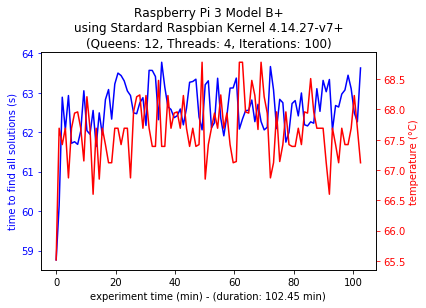

In [40]:
# plotting standard raspbian kernel with model b+ multi-thread solution
timestamp_std_bplus_mt = kernel_std_bplus_mt.time/60
time_std_bplus_mt = kernel_std_bplus_mt.seconds + kernel_std_bplus_mt.microseconds/1000000
temp_std_bplus_mt = (kernel_std_bplus_mt.cpu_temp + kernel_std_bplus_mt.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Stardard Raspbian Kernel 4.14.27-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_std_bplus_mt[:99], time_std_bplus_mt[:99], temp_std_bplus_mt[:99], title)

In [41]:
print("Time to 45 iterations: %.2f" %timestamp_std_bplus_mt[44])

Time to 45 iterations: 45.98


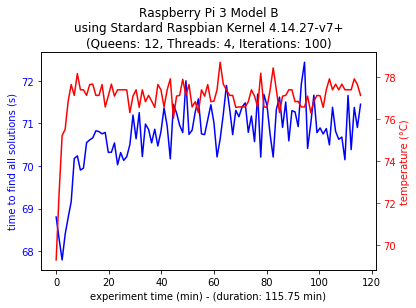

In [42]:
# plotting standard raspbian kernel with model b multi-thread solution
timestamp_std_b_mt = (kernel_std_b_mt.time)/60
time_std_b_mt = kernel_std_b_mt.seconds + kernel_std_b_mt.microseconds/1000000
temp_std_b_mt = (kernel_std_b_mt.cpu_temp + kernel_std_b_mt.gpu_temp)/2
title = "Raspberry Pi 3 Model B\nusing Stardard Raspbian Kernel 4.14.27-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"
plot_data(timestamp_std_b_mt[:99], time_std_b_mt[:99], temp_std_b_mt[:99], title)

In [43]:
print("Time to 45 iterations: %.2f" %timestamp_b_mt[44])

NameError: name 'timestamp_b_mt' is not defined

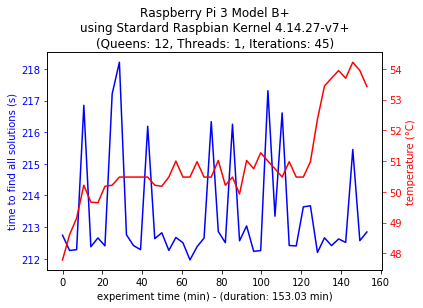

In [44]:
# plotting standard raspbian kernel with model b+ single-thread solution

timestamp_std_bplus_st = kernel_std_bplus_st.time/60
time_std_bplus_st = kernel_std_bplus_st.seconds + kernel_std_bplus_st.microseconds/1000000
temp_std_bplus_st = (kernel_std_bplus_st.cpu_temp + kernel_std_bplus_st.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Stardard Raspbian Kernel 4.14.27-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"
plot_data(timestamp_std_bplus_st[:44], time_std_bplus_st[:44], temp_std_bplus_st[:44], title)

In [45]:
print("Time to 45 iterations: %.2f" %timestamp_std_bplus_st[44])

Time to 45 iterations: 156.57


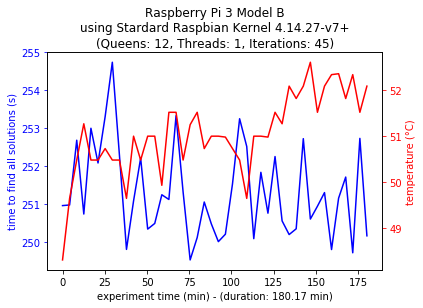

In [46]:
# plotting standard raspbian kernel with model b single-thread solution

timestamp_std_b_st = kernel_std_b_st.time/60
time_std_b_st = kernel_std_b_st.seconds + kernel_std_b_st.microseconds/1000000
temp_std_b_st = (kernel_std_b_st.cpu_temp + kernel_std_b_st.gpu_temp)/2
title = "Raspberry Pi 3 Model B\nusing Stardard Raspbian Kernel 4.14.27-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"
plot_data(timestamp_std_b_st[:44], time_std_b_st[:44], temp_std_b_st[:44], title)

In [47]:
print("Time to 50 iterations: %.2f" %timestamp_std_b_st[44])

Time to 50 iterations: 184.35


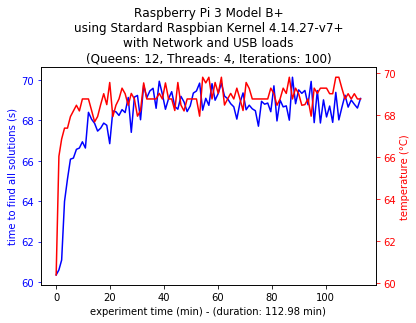

In [48]:
# plotting standard raspbian kernel with model b+ multi-thread solution
timestamp_std_bplus_mt_net = kernel_std_bplus_mt_network.time/60
time_std_bplus_mt_net = kernel_std_bplus_mt_network.seconds + kernel_std_bplus_mt_network.microseconds/1000000
temp_std_bplus_mt_net = (kernel_std_bplus_mt_network.cpu_temp + kernel_std_bplus_mt_network.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Stardard Raspbian Kernel 4.14.27-v7+\nwith Network and USB loads\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_std_bplus_mt_net, time_std_bplus_mt_net, temp_std_bplus_mt_net, title)

In [49]:
print("Time to 50 iterations: %.2f" %timestamp_std_bplus_mt_net[44])

Time to 50 iterations: 49.77


In [50]:
# multi-thread vs single-thread
mt_timing_std_bplus = (time_std_bplus_st[:44,None]/time_std_bplus_mt[:44,None])
mt_timing_std_b = time_std_b_st[:44]/time_std_b_mt[:44] 

print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(mt_timing_std_bplus), np.mean(mt_timing_std_b)))
print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(time_std_bplus_mt), np.mean(time_std_b_mt)))

Multi-thread B+: 3.42 | Multi-thread B: 3.57
Multi-thread B+: 62.66 | Multi-thread B: 70.85


In [51]:
# model B vs B+ single- multi-thread
mt_timing_std_bplus_vs_b = time_std_b_mt[:99]/time_std_bplus_mt[:99]
st_timing_std_bplus_vs_b = time_std_b_st[:44]/time_std_bplus_st[:44]

print("Multi-thread: %.2f | Single-thread B: %.2f" % (np.mean(mt_timing_std_bplus_vs_b), np.mean(st_timing_std_bplus_vs_b)))
print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(time_std_bplus_st), np.mean(time_std_b_st)))

Multi-thread: 1.13 | Single-thread B: 1.18
Multi-thread B+: 213.34 | Multi-thread B: 251.30


In [52]:
max_std_mt_bplus_temp = np.max(temp_std_bplus_mt)
max_std_mt_b_temp = np.max(temp_std_b_mt)

max_std_st_bplus_temp = np.max(temp_std_bplus_st)
max_std_st_b_temp = np.max(temp_std_b_st)

print("Max. temp. %.2f | Max. temp. %.2f" % (max_std_mt_bplus_temp, max_std_mt_b_temp))
print("Max. temp. %.2f | Max. temp. %.2f" % (max_std_st_bplus_temp, max_std_st_b_temp))

Max. temp. 68.78 | Max. temp. 78.69
Max. temp. 54.22 | Max. temp. 52.61


In [53]:
max_std_mt_bplus_net_temp = np.max(temp_std_bplus_mt_net)

print("Max. temp. %.2f" % (max_std_mt_bplus_net_temp))


Max. temp. 69.81


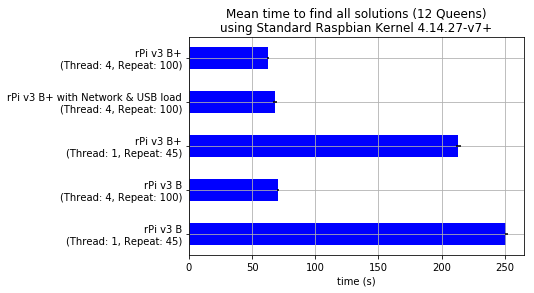

In [54]:
# multi thread standard
mean_time_std_mt_bplus = np.mean(time_std_bplus_mt[:99])
var_time_std_mt_bplus = np.std(time_std_bplus_mt[:99])
mean_time_std_mt_b = np.mean(time_std_b_mt[:99])
var_time_std_mt_b = np.std(time_std_b_mt[:99])

# multi thread standard with load
mean_time_std_mt_bplus_net = np.mean(time_std_bplus_mt_net)
var_time_std_mt_bplus_net = np.std(time_std_bplus_mt_net)

#single thread standard
mean_time_std_st_bplus = np.mean(time_std_bplus_st[:44])
var_time_std_st_bplus = np.std(time_std_bplus_st[:44])
mean_time_std_st_b = np.mean(time_std_b_st[:44])
var_time_std_st_b = np.std(time_std_b_st[:44])


ypos = [0, 0.2, 0.4, 0.6, 0.8]
performance = [mean_time_std_mt_bplus, mean_time_std_mt_bplus_net, mean_time_std_st_bplus, mean_time_std_mt_b, mean_time_std_st_b ]
error = [var_time_std_mt_bplus, var_time_std_mt_bplus_net, var_time_std_st_bplus, var_time_std_mt_b, var_time_std_st_b]
labels = ['rPi v3 B+\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+ with Network & USB load\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+\n(Thread: 1, Repeat: 45)',
          'rPi v3 B\n(Thread: 4, Repeat: 100)',
          'rPi v3 B\n(Thread: 1, Repeat: 45)']
title = 'Mean time to find all solutions (12 Queens)\nusing Standard Raspbian Kernel 4.14.27-v7+'

color = 'blue'
xlabel = 'time (s)'
plot_barh(ypos, performance, error, labels, title, color, xlabel)

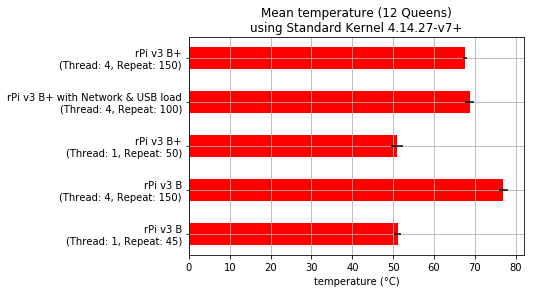

In [55]:
# multi thread standard 
mean_temp_std_mt_bplus = np.mean(temp_std_bplus_mt[:99])
var_temp_std_mt_bplus = np.std(temp_std_bplus_mt[:99])
mean_temp_std_mt_b = np.mean(temp_std_b_mt[:99])
var_temp_std_mt_b = np.std(temp_std_b_mt[:99])

# multi thread standard with load
mean_temp_std_mt_bplus_net = np.mean(temp_std_bplus_mt_net)
var_temp_std_mt_bplus_net = np.std(temp_std_bplus_mt_net)

#single thread
mean_temp_std_st_bplus = np.mean(temp_std_bplus_st[:44])
var_temp_std_st_bplus = np.std(temp_std_bplus_st[:44])
mean_temp_std_st_b = np.mean(temp_std_b_st[:44])
var_temp_std_st_b = np.std(temp_std_b_st[:44])

ypos = [0, 0.2, 0.4, 0.6, 0.8]
performance = [mean_temp_std_mt_bplus, mean_temp_std_mt_bplus_net, mean_temp_std_st_bplus, mean_temp_std_mt_b, mean_temp_std_st_b ]
error = [var_temp_std_mt_bplus, var_temp_std_mt_bplus_net, var_temp_std_st_bplus, var_temp_std_mt_b, var_temp_std_st_b]
labels = ['rPi v3 B+\n(Thread: 4, Repeat: 150)',
          'rPi v3 B+ with Network & USB load\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+\n(Thread: 1, Repeat: 50)',
          'rPi v3 B\n(Thread: 4, Repeat: 150)',
          'rPi v3 B\n(Thread: 1, Repeat: 45)']
title = 'Mean temperature (12 Queens)\nusing Standard Kernel 4.14.27-v7+'

color = 'red'
xlabel = 'temperature (°C)'
plot_barh(ypos, performance, error, labels, title, color, xlabel)

**Preempt-RT Raspbian Kernel 4.14.27-rt21-v7**

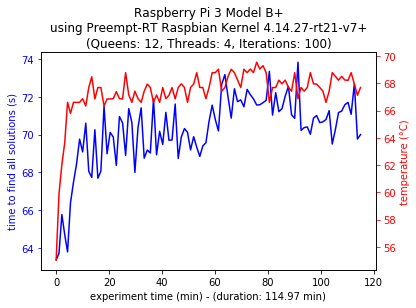

In [56]:
# plotting preempt-rt raspbian kernel with model b+ multi-thread solution
timestamp_rt_bplus_mt = kernel_rt_bplus_mt.time/60
time_rt_bplus_mt = kernel_rt_bplus_mt.seconds + kernel_rt_bplus_mt.microseconds/1000000
temp_rt_bplus_mt = (kernel_rt_bplus_mt.cpu_temp + kernel_rt_bplus_mt.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_rt_bplus_mt[:99], time_rt_bplus_mt[:99], temp_rt_bplus_mt[:99], title)

In [57]:
print("Time to 45 iterations: %.2f" %timestamp_rt_bplus_mt[44])

Time to 45 iterations: 50.77


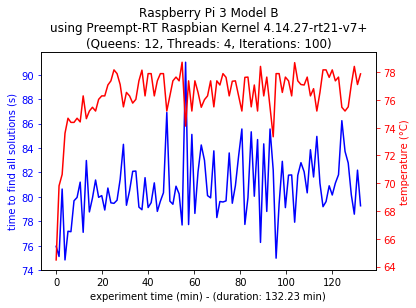

In [58]:
# plotting preempt-rt raspbian kernel with model b multi-thread solution
timestamp_rt_b_mt = kernel_rt_b_mt.time/60

time_rt_b_mt = kernel_rt_b_mt.seconds + kernel_rt_b_mt.microseconds/1000000
temp_rt_b_mt = (kernel_rt_b_mt.cpu_temp + kernel_rt_b_mt.gpu_temp)/2
title = "Raspberry Pi 3 Model B\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_rt_b_mt[:99], time_rt_b_mt[:99], temp_rt_b_mt[:99], title)

In [59]:
print("Time to 45 iterations: %.2f" %timestamp_rt_b_mt[44])

Time to 45 iterations: 58.95


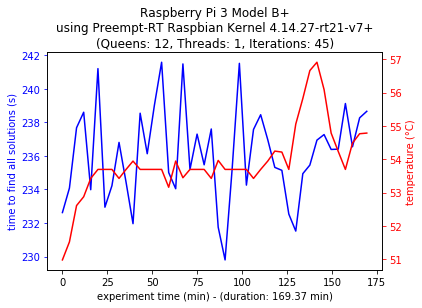

In [60]:
# plotting preempt-rt raspbian kernel with model b+ single-thread solution
timestamp_rt_bplus_st = kernel_rt_bplus_st.time/60
time_rt_bplus_st = kernel_rt_bplus_st.seconds + kernel_rt_bplus_st.microseconds/1000000
temp_rt_bplus_st = (kernel_rt_bplus_st.cpu_temp + kernel_rt_bplus_st.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"

plot_data(timestamp_rt_bplus_st[:44], time_rt_bplus_st[:44], temp_rt_bplus_st[:44], title)

In [61]:
print("Time to 45 iterations: %.2f" %timestamp_rt_bplus_st[44])

Time to 45 iterations: 173.37


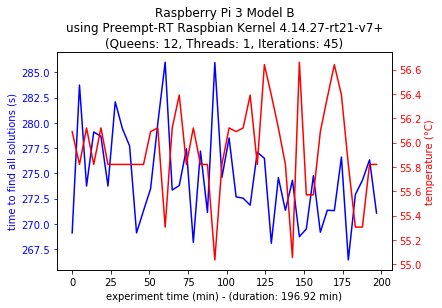

In [62]:
# plotting preempt-rt raspbian kernel with model b single-thread solution
timestamp_rt_b_st = kernel_rt_b_st.time/60
time_rt_b_st = kernel_rt_b_st.seconds + kernel_rt_b_st.microseconds/1000000
temp_rt_b_st = (kernel_rt_b_st.cpu_temp + kernel_rt_b_st.gpu_temp)/2
title = "Raspberry Pi 3 Model B\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"

plot_data(timestamp_rt_b_st[:44], time_rt_b_st[:44], temp_rt_b_st[:44], title)

In [63]:
print("Time to 45 iterations: %.2f" %timestamp_rt_b_st[44])

Time to 45 iterations: 201.62


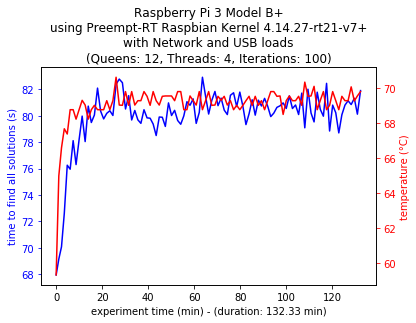

In [64]:
# plotting standard raspbian kernel with model b+ multi-thread solution
timestamp_rt_bplus_mt_net = kernel_rt_bplus_mt_network.time/60
time_rt_bplus_mt_net = kernel_rt_bplus_mt_network.seconds + kernel_rt_bplus_mt_network.microseconds/1000000
temp_rt_bplus_mt_net = (kernel_rt_bplus_mt_network.cpu_temp + kernel_rt_bplus_mt_network.gpu_temp)/2
title = "Raspberry Pi 3 Model B+\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\nwith Network and USB loads\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_rt_bplus_mt_net, time_rt_bplus_mt_net, temp_rt_bplus_mt_net, title)

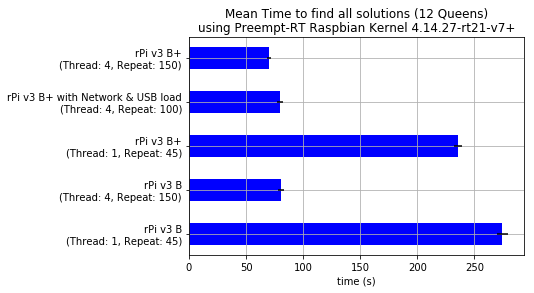

In [65]:
# multi thread standard
mean_time_rt_mt_bplus = np.mean(time_rt_bplus_mt)
var_time_rt_mt_bplus = np.std(time_rt_bplus_mt)
mean_time_rt_mt_b = np.mean(time_rt_b_mt)
var_time_rt_mt_b = np.std(time_rt_b_mt)

# multi thread standard with load
mean_time_rt_mt_bplus_net = np.mean(time_rt_bplus_mt_net)
var_time_rt_mt_bplus_net = np.std(time_rt_bplus_mt_net)

#single thread standard
mean_time_rt_st_bplus = np.mean(time_rt_bplus_st)
var_time_rt_st_bplus = np.std(time_rt_bplus_st)
mean_time_rt_st_b = np.mean(time_rt_b_st)
var_time_rt_st_b = np.std(time_rt_b_st)

ypos = [0, 0.2, 0.4, 0.6, 0.8]
performance = [mean_time_rt_mt_bplus, mean_time_rt_mt_bplus_net, mean_time_rt_st_bplus, mean_time_rt_mt_b, mean_time_rt_st_b ]
error = [var_time_rt_mt_bplus, var_time_rt_mt_bplus_net, var_time_rt_st_bplus, var_time_rt_mt_b, var_time_rt_st_b]
labels = ['rPi v3 B+\n(Thread: 4, Repeat: 150)',
          'rPi v3 B+ with Network & USB load\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+\n(Thread: 1, Repeat: 45)',
          'rPi v3 B\n(Thread: 4, Repeat: 150)',
          'rPi v3 B\n(Thread: 1, Repeat: 45)']
title = 'Mean Time to find all solutions (12 Queens)\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+'

color = 'blue'
xlabel = 'time (s)'
plot_barh(ypos, performance, error, labels, title, color, xlabel)

In [66]:
# multi-thread vs single-thread
mt_timing_rt_bplus = (time_rt_bplus_st[:44,None]/time_rt_bplus_mt[:44,None])
mt_timing_rt_b = time_rt_b_st[:44]/time_rt_b_mt[:44] 

print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(mt_timing_rt_bplus), np.mean(mt_timing_rt_b)))
print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(time_rt_bplus_mt), np.mean(time_rt_b_mt)))

# model B vs B+ single- multi-thread
mt_timing_rt_bplus_vs_b = time_rt_b_mt[:99]/time_rt_bplus_mt[:99]
st_timing_rt_bplus_vs_b = time_rt_b_st[:44]/time_rt_bplus_st[:44]


print("Multi-thread: %.2f | Single-thread B: %.2f" % (np.mean(mt_timing_rt_bplus_vs_b), np.mean(st_timing_rt_bplus_vs_b)))
print("Multi-thread B+: %.2f | Multi-thread B: %.2f" % (np.mean(time_rt_bplus_st), np.mean(time_rt_b_st)))

max_rt_mt_bplus_temp = np.max(temp_rt_bplus_mt)
max_rt_mt_b_temp = np.max(temp_rt_b_mt)

max_rt_st_bplus_temp = np.max(temp_rt_bplus_st)
max_rt_st_b_temp = np.max(temp_rt_b_st)

print("Max. temp. %.2f | Max. temp. %.2f" % (max_rt_mt_bplus_temp, max_rt_mt_b_temp))
print("Max. temp. %.2f | Max. temp. %.2f" % (max_rt_st_bplus_temp, max_rt_st_b_temp))

max_rt_mt_bplus_net_temp = np.max(temp_rt_bplus_mt_net)

print("Max. temp. %.2f" % (max_rt_mt_bplus_net_temp))


Multi-thread B+: 3.43 | Multi-thread B: 3.43
Multi-thread B+: 70.38 | Multi-thread B: 80.74
Multi-thread: 1.15 | Single-thread B: 1.16
Multi-thread B+: 235.75 | Multi-thread B: 274.67
Max. temp. 69.55 | Max. temp. 78.72
Max. temp. 56.91 | Max. temp. 56.66
Max. temp. 70.64


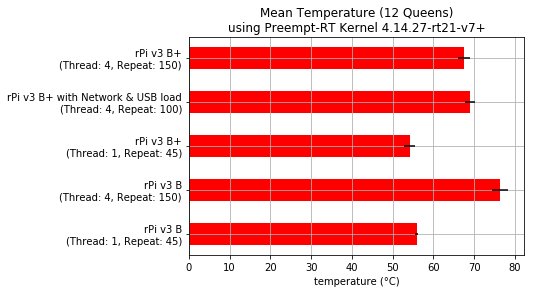

In [67]:
# multi thread
mean_temp_rt_mt_bplus = np.mean(temp_rt_bplus_mt)
var_temp_rt_mt_bplus = np.std(temp_rt_bplus_mt)
mean_temp_rt_mt_b = np.mean(temp_rt_b_mt)
var_temp_rt_mt_b = np.std(temp_rt_b_mt)

# multi thread standard with load
mean_temp_rt_mt_bplus_net = np.mean(temp_rt_bplus_mt_net)
var_temp_rt_mt_bplus_net = np.std(temp_rt_bplus_mt_net)

#single thread
mean_temp_rt_st_bplus = np.mean(temp_rt_bplus_st)
var_temp_rt_st_bplus = np.std(temp_rt_bplus_st)
mean_temp_rt_st_b = np.mean(temp_rt_b_st)
var_temp_rt_st_b = np.std(temp_rt_b_st)

ypos = [0, 0.2, 0.4, 0.6, 0.8]
performance = [mean_temp_rt_mt_bplus, mean_temp_rt_mt_bplus_net, mean_temp_rt_st_bplus, mean_temp_rt_mt_b, mean_temp_rt_st_b ]
error = [var_temp_rt_mt_bplus, var_temp_rt_mt_bplus_net, var_temp_rt_st_bplus, var_temp_rt_mt_b, var_temp_rt_st_b]
labels = ['rPi v3 B+\n(Thread: 4, Repeat: 150)',
          'rPi v3 B+ with Network & USB load\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+\n(Thread: 1, Repeat: 45)',
          'rPi v3 B\n(Thread: 4, Repeat: 150)',
          'rPi v3 B\n(Thread: 1, Repeat: 45)']
title = 'Mean Temperature (12 Queens)\nusing Preempt-RT Kernel 4.14.27-rt21-v7+'

color = 'red'
xlabel = 'temperature (°C)'
plot_barh(ypos, performance, error, labels, title, color, xlabel)

**Comparison**

In [68]:
mt_timing_rt_std_bplus = time_rt_bplus_mt[:99,None]/time_std_bplus_mt[:99,None]
mt_timing_rt_std_b = time_rt_b_mt[:44]/time_std_b_mt[:44]

st_timing_rt_std_bplus = time_rt_bplus_st[:99,None]/time_std_bplus_st[:99,None]
st_timing_rt_std_b = time_rt_b_st[:44]/time_std_b_st[:44]

print("RT B+ MT: %.2f | RT B MT: %.2f" % (np.mean(mt_timing_rt_std_bplus), np.mean(mt_timing_rt_std_b)))
print("RT B+ ST: %.2f | RT B ST: %.2f" % (np.mean(st_timing_rt_std_bplus), np.mean(st_timing_rt_std_b)))



RT B+ MT: 1.12 | RT B MT: 1.14
RT B+ ST: 1.11 | RT B ST: 1.09


**Networking**

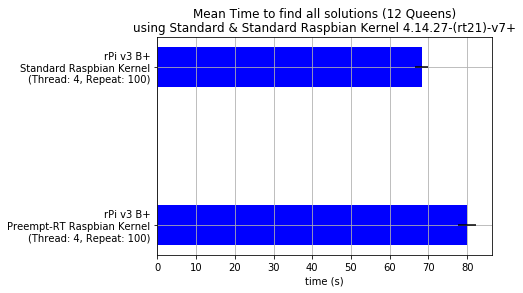

In [69]:
# multi thread rt
mean_time_rt_mt_bplus_net = np.mean(time_rt_bplus_mt_net)
var_time_rt_mt_bplus_net = np.std(time_rt_bplus_mt_net)

# multi thread standard
mean_time_std_mt_bplus_net = np.mean(time_std_bplus_mt_net)
var_time_std_mt_bplus_net = np.std(time_std_bplus_mt_net)

ypos = [0, 0.4]
performance = [mean_time_std_mt_bplus_net, mean_time_rt_mt_bplus_net]
error = [var_time_std_mt_bplus_net, var_time_rt_mt_bplus_net]
labels = ['rPi v3 B+\nStandard Raspbian Kernel\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+\nPreempt-RT Raspbian Kernel\n(Thread: 4, Repeat: 100)']
title = 'Mean Time to find all solutions (12 Queens)\nusing Standard & Standard Raspbian Kernel 4.14.27-(rt21)-v7+'

color = 'blue'
xlabel = 'time (s)'
plot_barh(ypos, performance, error, labels, title, color, xlabel)

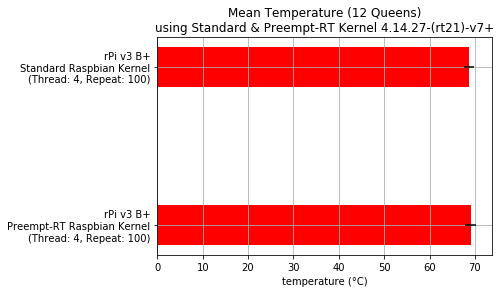

In [70]:
# multi thread rt
mean_temp_rt_mt_bplus_net = np.mean(temp_rt_bplus_mt_net)
var_temp_rt_mt_bplus_net = np.std(temp_rt_bplus_mt_net)

# multi thread standard
mean_temp_std_mt_bplus_net = np.mean(temp_std_bplus_mt_net)
var_temp_std_mt_bplus_net = np.std(temp_std_bplus_mt_net)

ypos = [0, 0.4]
performance = [mean_temp_std_mt_bplus_net, mean_temp_rt_mt_bplus_net]
error = [var_temp_std_mt_bplus_net, var_temp_rt_mt_bplus_net]
labels = ['rPi v3 B+\nStandard Raspbian Kernel\n(Thread: 4, Repeat: 100)',
          'rPi v3 B+\nPreempt-RT Raspbian Kernel\n(Thread: 4, Repeat: 100)']
title = 'Mean Temperature (12 Queens)\nusing Standard & Preempt-RT Kernel 4.14.27-(rt21)-v7+'

color = 'red'
xlabel = 'temperature (°C)'
plot_barh(ypos, performance, error, labels, title, color, xlabel)

In [71]:
print("Max. temp: %.2f | Max. temp: %.2f" %(np.max(temp_std_bplus_mt_net),np.max(temp_rt_bplus_mt_net) ))

Max. temp: 69.81 | Max. temp: 70.64


In [72]:
mt_timing_rt_std_bplus_net = time_rt_bplus_mt_net[:99,None]/time_std_bplus_mt_net[:99,None]
mt_temp_rt_std_bplus_net = temp_rt_bplus_mt_net[:99,None]/temp_std_bplus_mt_net[:99,None]


print("RT B+ MT: %.2f" % (np.mean(mt_timing_rt_std_bplus_net)))
print("RT B+ MT: %.2f" % (np.mean(mt_temp_rt_std_bplus_net)))


RT B+ MT: 1.17
RT B+ MT: 1.01


In [73]:
kernel_rt_bplus_mt_network_client.head()

,time,iteration,size,seconds,microseconds
0,0,0,4919186,8,512063
1,3,1,1511855,2,933211
2,4,2,437643,0,543526
3,8,3,3224957,4,505158
4,15,4,4919186,7,64310


Text(0.5,1,'Ethernet transfer data rate\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\nMin.: 1.01 kb/s, Max.: 25.74 kb/s, Mean: 5.91 kb/s')

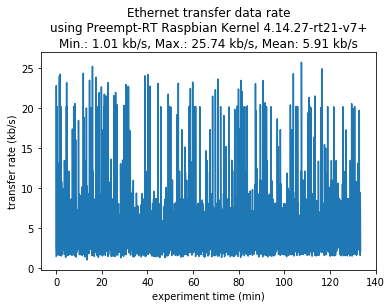

In [74]:
experiment_time = kernel_rt_bplus_mt_network_client.time/60
transfer_time_rt = (kernel_rt_bplus_mt_network_client.seconds+kernel_rt_bplus_mt_network_client.microseconds/1000000)
transfer_rate_rt = kernel_rt_bplus_mt_network_client.size/transfer_time_rt/1024
fig, ax1 = plt.subplots()
ax1.plot(experiment_time, transfer_rate_rt)
ax1.set_xlabel('experiment time (min)')
ax1.set_ylabel('transfer rate (kb/s)')
ax1.set_title('Ethernet transfer data rate\nusing Preempt-RT Raspbian Kernel 4.14.27-rt21-v7+\nMin.: %.2f kb/s, Max.: %.2f kb/s, Mean: %.2f kb/s' %(np.min(transfer_rate_rt), np.max(transfer_rate_rt), np.mean(transfer_rate_rt)))


Text(0.5,1,'Ethernet transfer data rate\nusing Standard Raspbian Kernel 4.14.27-v7+\n Min.: 3.29 kb/s, Max.: 76.24 kb/s, Mean: 17.11 kb/s')

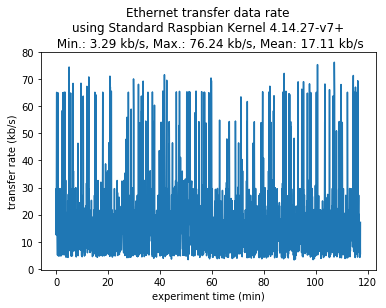

In [75]:
experiment_time = kernel_rt_bplus_mt_network_client.time/60
transfer_time_std = (kernel_std_bplus_mt_network_client.seconds+kernel_std_bplus_mt_network_client.microseconds/1000000)
transfer_rate_std = kernel_std_bplus_mt_network_client.size/transfer_time_std/1024
fig, ax1 = plt.subplots()
ax1.plot(experiment_time[:2223], transfer_rate_std[:2223])  # 2223 -> I forgot to stop the clock! ;)
ax1.set_xlabel('experiment time (min)')
ax1.set_ylabel('transfer rate (kb/s)')
ax1.set_title('Ethernet transfer data rate\nusing Standard Raspbian Kernel 4.14.27-v7+\n Min.: %.2f kb/s, Max.: %.2f kb/s, Mean: %.2f kb/s' %(np.min(transfer_rate_std[:2223]), np.max(transfer_rate_std[:2223]), np.mean(transfer_rate_std[:2223])))